1. Configuração Inicial: Carregando as Bibliotecas e o Dataset

In [21]:
# Carregar as bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [22]:

# Carregar o dataset
df = pd.read_csv('teste.csv')


In [23]:

# Exibir as primeiras 5 linhas para uma pré-visualização
print("Primeiras 5 linhas do dataset:")
print(df.head())


Primeiras 5 linhas do dataset:
   ID_Venda           Data_Venda                            ID_Cliente  \
0         1  2025-02-24 04:43:07  667a825a-5bec-4d9e-852c-3c5daf6b518b   
1         2  2025-04-23 20:10:23  4b7746b2-e9d4-4bd6-bd81-4e67e75985f4   
2         3  2025-03-26 08:11:27  208362cb-ab79-4bd3-ab67-dab2af4ff655   
3         4  2025-08-05 21:18:57  cf68fcc5-1e7c-4445-9599-35f0d352ba32   
4         5  2025-06-03 13:05:29  8495274d-ca50-4ca6-8ca6-dfae48ef60ef   

             Nome_Cliente                     Email_Cliente  \
0  Patricia Artigas Badía        patricia.badía@outlook.com   
1              Jamie Hill            jamie.hill@outlook.com   
2  Valerio Grossi-Soffici  valerio.grossi-soffici@gmail.com   
3      Gil Paiva-Baptista      gil.paiva-baptista@gmail.com   
4          Arthur da Cruz             arthur.cruz@yahoo.com   

                                              País Categoria_Produto  \
0  Reino Unido de Gran Bretaña e Irlanda del Norte        Acessórios   
1

In [24]:

# Exibir informações sobre o dataset (tipos de dados, valores nulos, etc.)
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Venda           10 non-null     int64  
 1   Data_Venda         10 non-null     object 
 2   ID_Cliente         10 non-null     object 
 3   Nome_Cliente       10 non-null     object 
 4   Email_Cliente      10 non-null     object 
 5   País               10 non-null     object 
 6   Categoria_Produto  10 non-null     object 
 7   Produto            10 non-null     object 
 8   Preço_Unitário     10 non-null     float64
 9   Quantidade         10 non-null     int64  
 10  Total_Venda        10 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1012.0+ bytes
None


2. Limpeza e Pré-processamento dos Dados (ETL)

In [15]:
# Converter a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])



In [16]:
# Extrair ano, mês e dia da semana para análises futuras
df['Ano'] = df['Data_Venda'].dt.year
df['Mês'] = df['Data_Venda'].dt.month
df['Dia_da_Semana'] = df['Data_Venda'].dt.day_name()



In [17]:
# Verificar se há valores ausentes (nulos)
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum())




Contagem de valores nulos por coluna:
ID_Venda             0
Data_Venda           0
ID_Cliente           0
Nome_Cliente         0
Email_Cliente        0
País                 0
Categoria_Produto    0
Produto              0
Preço_Unitário       0
Quantidade           0
Total_Venda          0
Ano                  0
Mês                  0
Dia_da_Semana        0
dtype: int64


In [18]:
# Verificar se há linhas duplicadas
print("\nNúmero de linhas duplicadas:")
print(df.duplicated().sum())




Número de linhas duplicadas:
0


In [19]:
# Se houver duplicatas, você pode removê-las usando:
# df.drop_duplicates(inplace=True)

3. Análise Exploratória de Dados (EDA)


Vendas totais por mês:
Mês
1     9295471.0
2     8511313.0
3     8906733.0
4     8888271.0
5     9196092.0
6     8830007.0
7     9269292.0
8     9049569.0
9     9069071.0
10    8978837.0
11    8777744.0
12    9248634.0
Name: Total_Venda, dtype: float64


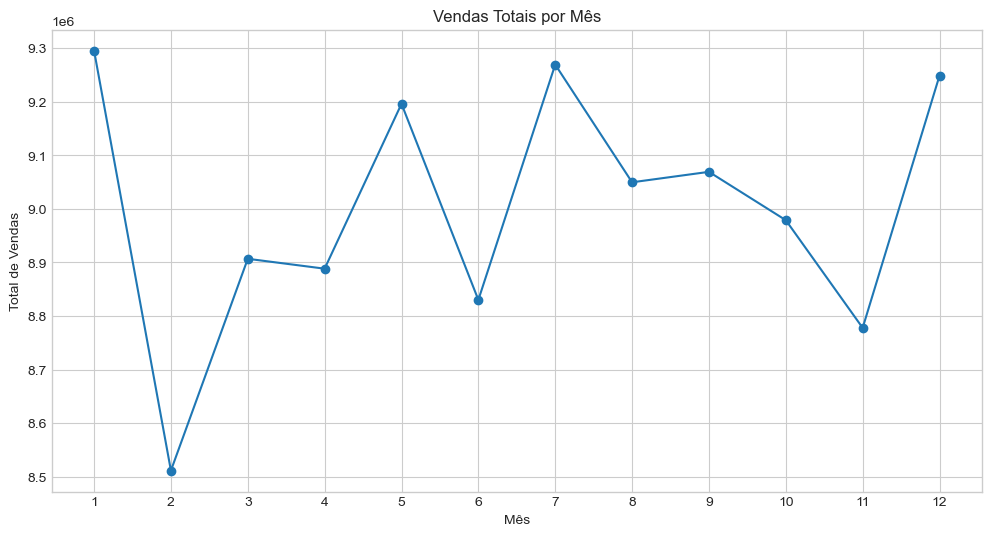

In [20]:
# Vendas totais por mês
vendas_por_mes = df.groupby('Mês')['Total_Venda'].sum()
print("\nVendas totais por mês:")
print(vendas_por_mes)

plt.figure(figsize=(12, 6))
vendas_por_mes.plot(kind='line', marker='o')
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(range(1, 13))
plt.show()